# Comparative analysis 

This notebook evaluates the performance of the S2RMS semi-supervised regression method compared to two supervised learning baselines: ElasticNet and XGBoost. All models are trained using only a subset of labeled data (`1%`, `5%`, and `10%`), with the rest of the dataset used for testing. For fairness, each method is evaluated on the same data splits. The goal is to assess how well S2RMS can generalize with limited supervision, and whether it offers advantages over traditional supervised methods under low-label conditions.

In [44]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [45]:
base_dir = "../results/wind/"
scales = ['1', '5', '10']
scale_labels = {'1': '1%', '5': '5%', '10': '10%'}

rmse_results = []

for scale in scales:
    folder = os.path.join(base_dir, scale.replace('0.', ''))
    for file in os.listdir(folder):
        if file.endswith(".csv"):
            df = pd.read_csv(os.path.join(folder, file))
            rmse_results.append({
                "Scale": f"{int(float(scale))}%",
                "Run": int(df['run'].values[0]),
                "RMSE": df['rmse'].values[0],
                "Model": "S2RMS"
            })

s2rms_df = pd.DataFrame(rmse_results)

summary_df = s2rms_df.groupby("Scale")["RMSE"].agg(["mean", "std"]).reset_index()
print("S2RMS Statistics:")
display(summary_df)

S2RMS Statistics:


,Scale,mean,std
0,1%,413.958366,16.200743
1,10%,336.933517,10.637894
2,5%,363.947256,18.878362


In [46]:
with open("../results/elasticnet_semisupervised_scores.json") as f:
    elastic = json.load(f)

with open("../results/xgboost_semisupervised_scores.json") as f:
    xgboost = json.load(f)

baseline_data = []

for scale in ['1%', '5%', '10%']:
    baseline_data.append({
        "Scale": scale,
        "Run": "avg",
        "RMSE": elastic[scale]['RMSE'],
        "Model": "ElasticNet"
    })
    baseline_data.append({
        "Scale": scale,
        "Run": "avg",
        "RMSE": xgboost[scale]['RMSE'],
        "Model": "XGBoost"
    })

baseline_df = pd.DataFrame(baseline_data)

display(baseline_df)


,Scale,Run,RMSE,Model
0,1%,avg,251.49,ElasticNet
1,1%,avg,198.28,XGBoost
2,5%,avg,203.87,ElasticNet
3,5%,avg,183.98,XGBoost
4,10%,avg,192.68,ElasticNet
5,10%,avg,134.77,XGBoost


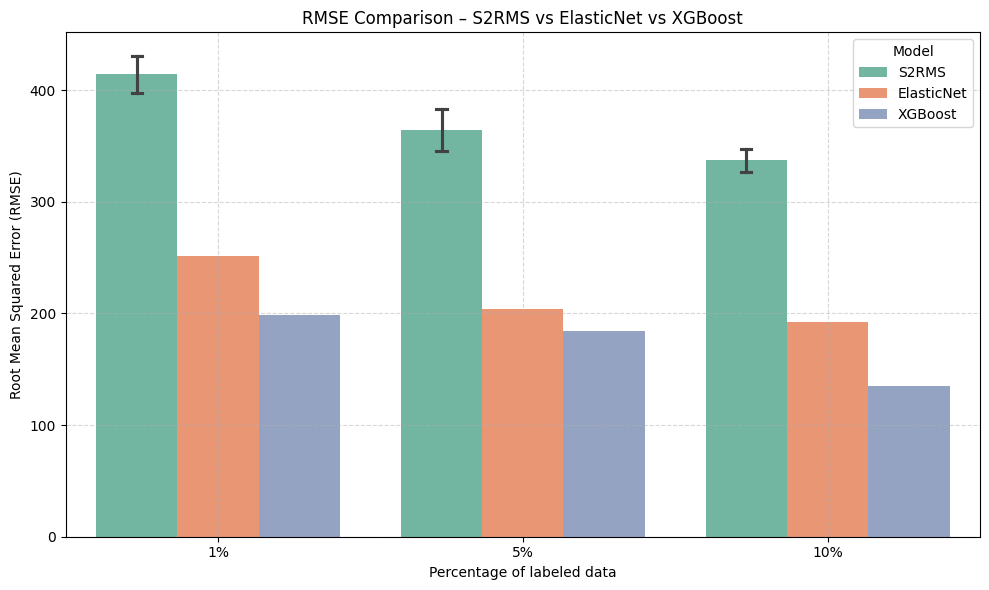

In [47]:
combined_df = pd.concat([s2rms_df, baseline_df], ignore_index=True)


plt.figure(figsize=(10, 6))
sns.barplot(data=combined_df, x="Scale", y="RMSE", hue="Model", errorbar='sd', capsize=0.1, palette="Set2")
plt.title("RMSE Comparison – S2RMS vs ElasticNet vs XGBoost")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.xlabel("Percentage of labeled data")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

The results show a clear performance advantage for supervised baselines, especially XGBoost, which consistently achieves the lowest RMSE across all label percentages. S2RMS, while competitive, produces higher error values but demonstrates a decreasing trend in RMSE as more labeled data becomes available. This suggests that S2RMS benefits from increased supervision but currently underperforms compared to fully supervised models in this setting. Further improvements could be explored in the triplet network architecture or co-training strategy to reduce this performance gap.